<a href="https://colab.research.google.com/github/zhanna-naumenko/DI-Bootcamp/blob/main/W5D2_DailyChallenge1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

# Upload kaggle.json file (Run this cell and select your kaggle.json file through the file picker)
from google.colab import files
uploaded = files.upload()

# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d juhi1994/superstore

100% 0.98M/0.98M [00:00<00:00, 1.52MB/s]
100% 0.98M/0.98M [00:00<00:00, 1.52MB/s]


In [3]:
!unzip superstore.zip

Archive:  superstore.zip
  inflating: US Superstore data.xls  


In [27]:
import pandas as pd
data_superstore = pd.read_excel('US Superstore data.xls')
# print(data_superstore)
# print(data_superstore.isnull().sum())
unique_values = data_superstore['Category'].unique()
print(unique_values)
data_superstore.drop_duplicates(inplace=True)
print(data_superstore)
data_superstore['Order Date'] = pd.to_datetime(data_superstore['Order Date'])
data_superstore['Ship Date'] = pd.to_datetime(data_superstore['Ship Date'])

['Furniture' 'Office Supplies' 'Technology']
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gut

In [30]:
# line chart to show sales trends over the years
import plotly.express as px
import pandas as pd

pivot_table = data_superstore.pivot_table(index='Order Date', columns='Category', values='Sales', aggfunc='sum')
print(pivot_table)
fig = px.line(pivot_table.reset_index(), x='Order Date', y=['Furniture', 'Office Supplies', 'Technology'], title='Sales Trends Over the Years')
fig.show()

Category    Furniture  Office Supplies  Technology
Order Date                                        
2014-01-03        NaN           16.448         NaN
2014-01-04        NaN          288.060         NaN
2014-01-05        NaN           19.536         NaN
2014-01-06  2573.8200          685.340    1147.940
2014-01-07    76.7280           10.430         NaN
...               ...              ...         ...
2017-12-26        NaN          814.594         NaN
2017-12-27        NaN           13.248     164.388
2017-12-28   551.2568         1091.244      14.850
2017-12-29  2330.7180          282.440     302.376
2017-12-30   323.1360          299.724      90.930

[1237 rows x 3 columns]


In [49]:
# interactive map to visualize sales distribution by country
sales_by_country = data_superstore.groupby('Country').sum()['Sales'].reset_index()
sales_by_region = data_superstore.groupby('Region').sum()['Sales'].reset_index()
print(sales_by_country)
print(sales_by_region)
fig = px.choropleth(sales_by_country,
                    locations='Country',
                    locationmode='country names',
                    color='Sales',
                    hover_name='Country',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Sales Distribution by Country')
fig.show()
fig = px.bar(sales_by_region, x='Region', y='Sales', color='Region', title="Sales Distribution by Regions")
fig.show()

         Country         Sales
0  United States  2.297201e+06
    Region        Sales
0  Central  501239.8908
1     East  678781.2400
2    South  391721.9050
3     West  725457.8245


<ipython-input-49-b52e5be105d4>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-49-b52e5be105d4>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [64]:
# bar chart showing top 10 products by sales
top_products = data_superstore.groupby('Product Name').sum().sort_values(by='Sales', ascending=False).head(10).reset_index()
print(top_products)
fig = px.bar(top_products, x='Product Name', y='Sales', color='Product Name', title="Top 10 Products")
fig.show()

                                        Product Name  Row ID  Postal Code  \
0              Canon imageCLASS 2200 Advanced Copier   28222       194875   
1  Fellowes PB500 Electric Punch Plastic Comb Bin...   61859       562064   
2  Cisco TelePresence System EX90 Videoconferenci...    2698        32216   
3       HON 5400 Series Task Chairs for Big and Tall   44560       448062   
4         GBC DocuBind TL300 Electric Binding System   64915       381549   
5   GBC Ibimaster 500 Manual ProClick Binding System   57937       302599   
6               Hewlett Packard LaserJet 3310 Copier   41444       428939   
7  HP Designjet T520 Inkjet Large Format Printer ...   19245        60433   
8          GBC DocuBind P400 Electric Binding System   27597       339780   
9        High Speed Automatic Electric Letter Opener   13590       266895   

       Sales  Quantity  Discount        Profit  
0  61599.824        20       0.6  2.519993e+04  
1  27453.384        31       2.4  7.753039e+03  
2  22

<ipython-input-64-66ab7c273eb8>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



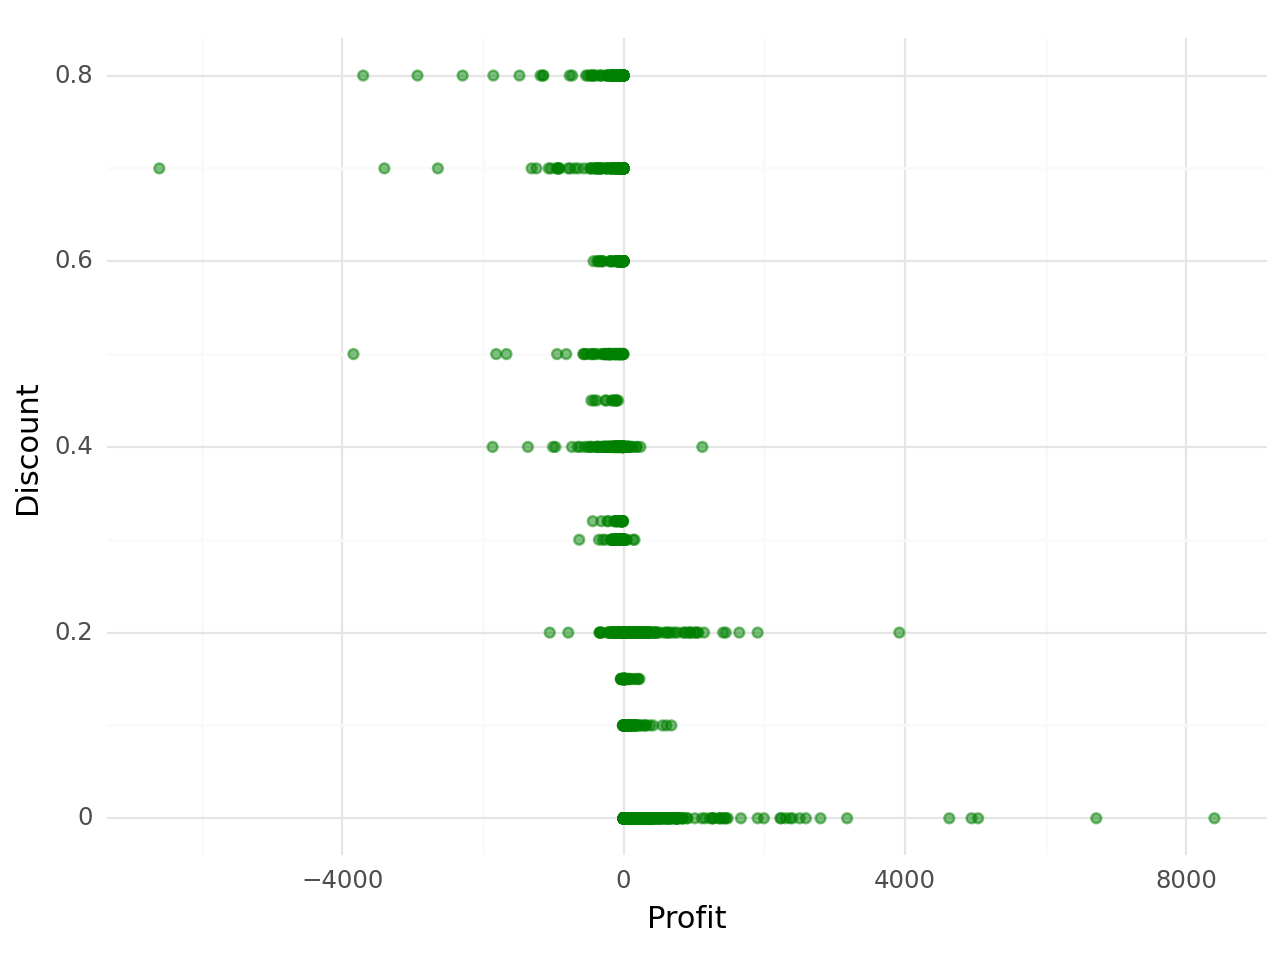

In [59]:
# a scatter plot to analyze the relationship between profit and discount
# scatter plot with plotly
fig = px.scatter(data_superstore, x="Profit", y="Discount", color='Category')
fig.show()

from plotnine import ggplot, aes, geom_point, theme_minimal

# scatter plot with plotnine
scatter_plot = (
    ggplot(data_superstore, aes(x='Profit', y='Discount')) +
    geom_point(color='g', alpha=0.5) +
    theme_minimal())
print(scatter_plot)

**1.Compare the insights gained from Plotly and Plotnine visualizations.**
Both Plotly and Plotnine are powerful visualization libraries, but they have some differences. Compared to Plotly, Plotnine may have a steeper learning curve for users who are not familiar with the grammar-based syntax.

**2.Document your observations about the ease of use and effectiveness of both tools.**
The Plotly is more user-friendly then Plotnine. Plotly is particularly effective for creating interactive visualizations that can be easily shared and explored. The Plotly is more interactivity and visualized.